In [26]:
import pandas as pd

# 读取数据
df = pd.read_excel('remove_student_teacher.xlsx', sheet_name='remove_student_teacher')

# 统计每个文本中问号的数量，得到问句数量
df['Question Count'] = df['text'].str.count('\?')

# 统计问句数量并输出
num_questions = df['Question Count'].sum()
print(f"Number of questions in 'text' column: {num_questions}")

# 保存处理后的数据到新的Excel文件
df.to_excel('remove_student_teacher_processed.xlsx', sheet_name='remove_student', index=False)


Number of questions in 'text' column: 1610


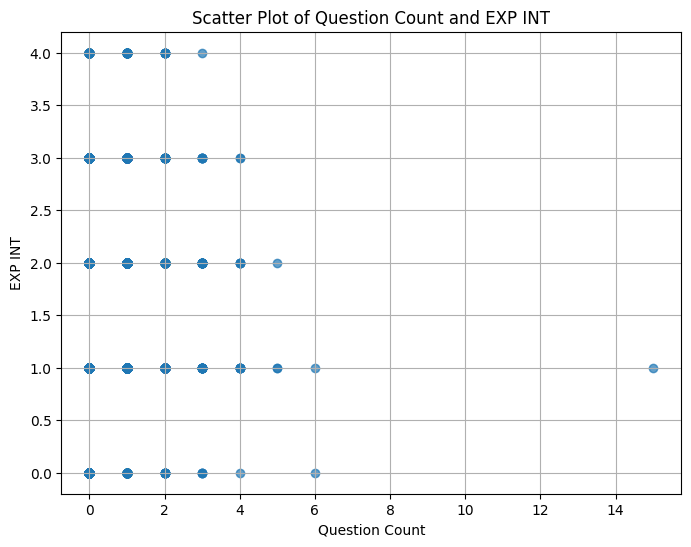

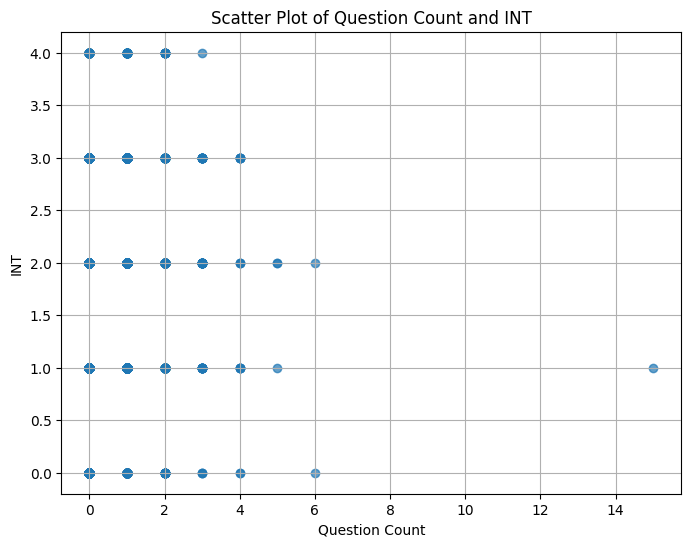

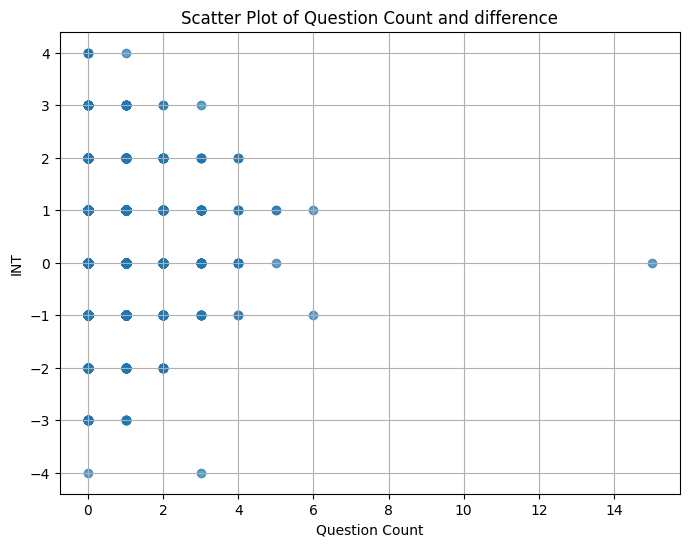

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_excel('remove_student_teacher_processed.xlsx', sheet_name='remove_student')

# 绘制"Question"列和"EXP INT"列的散点图
plt.figure(figsize=(8, 6))  # 调整图表大小
plt.scatter(df['Question'], df['EXP INT'], alpha=0.7)
plt.xlabel('Question Count')  # 设置横坐标标签
plt.ylabel('EXP INT')  # 设置纵坐标标签
plt.title('Scatter Plot of Question Count and EXP INT')  # 设置图表标题
plt.grid(True)  # 显示网格线
plt.show()

# 绘制"Question"列和"INT"列的散点图
plt.figure(figsize=(8, 6))  # 调整图表大小
plt.scatter(df['Question'], df['INT'], alpha=0.7)
plt.xlabel('Question Count')  # 设置横坐标标签
plt.ylabel('INT')  # 设置纵坐标标签
plt.title('Scatter Plot of Question Count and INT')  # 设置图表标题
plt.grid(True)  # 显示网格线
plt.show()

# 绘制"Question"列和"INT"列的散点图
plt.figure(figsize=(8, 6))  # 调整图表大小
plt.scatter(df['Question'], df['difference'], alpha=0.7)
plt.xlabel('Question Count')  # 设置横坐标标签
plt.ylabel('INT')  # 设置纵坐标标签
plt.title('Scatter Plot of Question Count and difference')  # 设置图表标题
plt.grid(True)  # 显示网格线
plt.show()

In [29]:
import pandas as pd

# 读取数据
df = pd.read_excel('remove_student_teacher_processed.xlsx', sheet_name='remove_student')

# 计算"Question"列和"EXP INT"列之间的相关系数
question_exp_int_corr = df['Question'].corr(df['EXP INT'])

# 计算"Question"列和"INT"列之间的相关系数
question_int_corr = df['Question'].corr(df['INT'])

# 计算"Question"列和"INT"列之间的相关系数
question_difference_corr = df['Question'].corr(df['difference'])

print(f"Correlation between 'Question' and 'EXP INT': {question_exp_int_corr}")
print(f"Correlation between 'Question' and 'INT': {question_int_corr}")
print(f"Correlation between 'Question' and 'difference': {question_difference_corr}")


Correlation between 'Question' and 'EXP INT': 0.03268358353487432
Correlation between 'Question' and 'INT': 0.06878820575703119
Correlation between 'Question' and 'difference': 0.10298898885957464


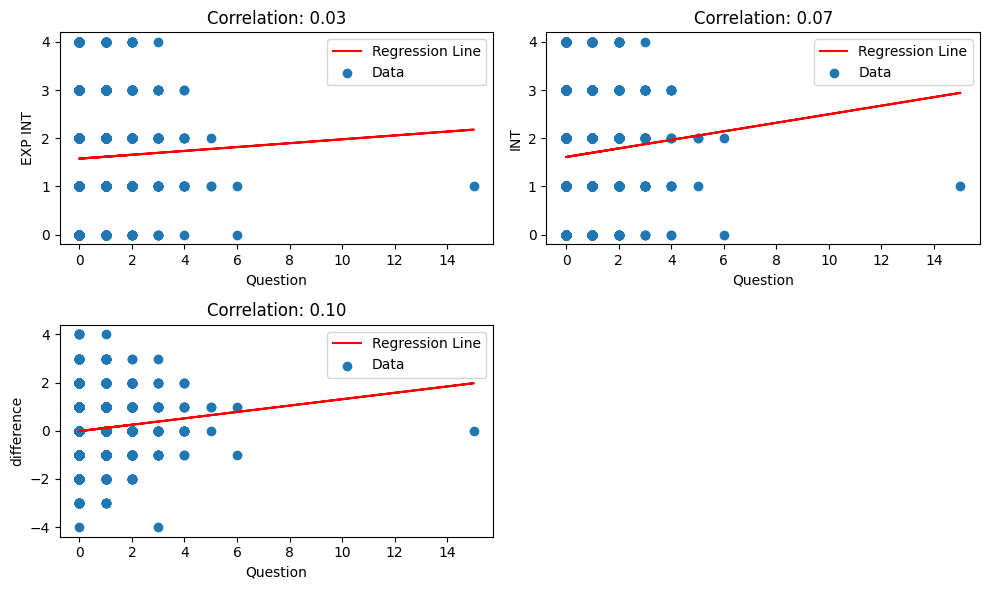

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Read the data from the "remove_student_teacher_processed.xlsx" file
df = pd.read_excel('remove_student_teacher_processed.xlsx')

# Drop rows with missing values in the 'EXP INT' and 'INT' columns
df = df.dropna(subset=['EXP INT', 'INT', 'difference'])

# Extract the "Question," "EXP INT," and "INT" columns
question = df['Question']
exp_int = df['EXP INT']
int_column = df['INT']
diff = df['difference']

# Perform linear regression and calculate the correlation coefficient
model_exp_int = LinearRegression()
model_exp_int.fit(question.values.reshape(-1, 1), exp_int)
exp_int_pred = model_exp_int.predict(question.values.reshape(-1, 1))
correlation_exp_int = np.corrcoef(question, exp_int)[0, 1]

model_int = LinearRegression()
model_int.fit(question.values.reshape(-1, 1), int_column)
int_pred = model_int.predict(question.values.reshape(-1, 1))
correlation_int = np.corrcoef(question, int_column)[0, 1]

model_diff = LinearRegression()
model_diff.fit(question.values.reshape(-1, 1), diff)
diff_pred = model_diff.predict(question.values.reshape(-1, 1))
correlation_diff = np.corrcoef(question, diff)[0, 1]

# Plot the data points and the regression line
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.scatter(question, exp_int, label='Data')
plt.plot(question, exp_int_pred, color='red', label='Regression Line')
plt.xlabel('Question')
plt.ylabel('EXP INT')
plt.title(f'Correlation: {correlation_exp_int:.2f}')
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(question, int_column, label='Data')
plt.plot(question, int_pred, color='red', label='Regression Line')
plt.xlabel('Question')
plt.ylabel('INT')
plt.title(f'Correlation: {correlation_int:.2f}')
plt.legend()

plt.subplot(2, 2, 3)
plt.scatter(question, diff, label='Data')
plt.plot(question, diff_pred, color='red', label='Regression Line')
plt.xlabel('Question')
plt.ylabel('difference')
plt.title(f'Correlation: {correlation_diff:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

EXP INT回归结果：
                            OLS Regression Results                            
Dep. Variable:               Question   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.177
Date:                Tue, 25 Jul 2023   Prob (F-statistic):             0.0748
Time:                        17:30:15   Log-Likelihood:                -3663.1
No. Observations:                2973   AIC:                             7330.
Df Residuals:                    2971   BIC:                             7342.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4983      0.028     17

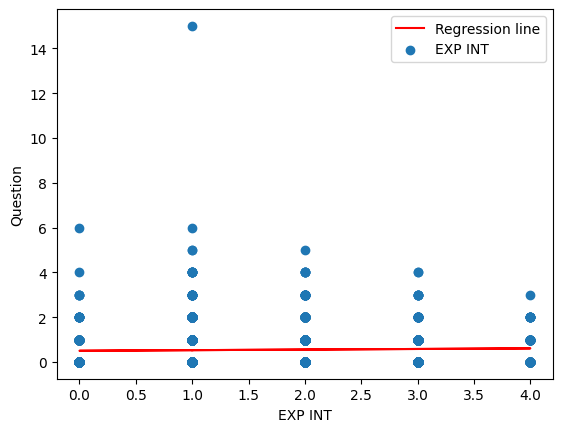

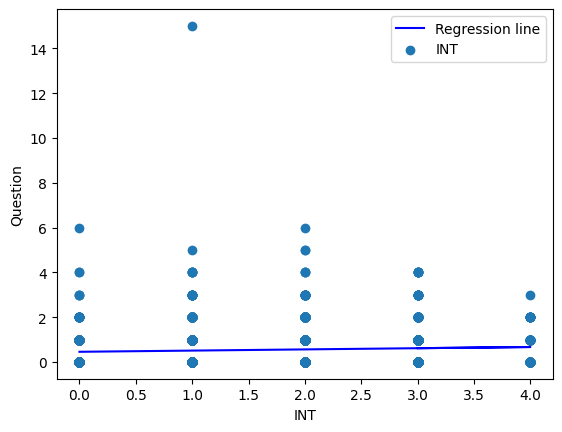

EXP INT和Question的相关系数: 0.03268358353487432
INT和Question的相关系数: 0.06878820575703119


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

X_exp_int = df["EXP INT"]
X_int = df["INT"]
y_question = df["Question"]

X_exp_int = sm.add_constant(X_exp_int)
X_int = sm.add_constant(X_int)

model_exp_int = sm.OLS(y_question, X_exp_int).fit()

model_int = sm.OLS(y_question, X_int).fit()

print("EXP INT回归结果：")
print(model_exp_int.summary())
print("\nINT回归结果：")
print(model_int.summary())

# 绘制EXP INT回归图
plt.scatter(X_exp_int["EXP INT"], y_question, label="EXP INT")
plt.plot(X_exp_int["EXP INT"], model_exp_int.predict(), color="red", label="Regression line")
plt.xlabel("EXP INT")
plt.ylabel("Question")
plt.legend()
plt.show()

# 绘制INT回归图
plt.scatter(X_int["INT"], y_question, label="INT")
plt.plot(X_int["INT"], model_int.predict(), color="blue", label="Regression line")
plt.xlabel("INT")
plt.ylabel("Question")
plt.legend()
plt.show()

# 相关系数（Pearson correlation coefficient）
correlation_exp_int = df["EXP INT"].corr(df["Question"])
correlation_int = df["INT"].corr(df["Question"])

print("EXP INT和Question的相关系数:", correlation_exp_int)
print("INT和Question的相关系数:", correlation_int)


Question作为自变量，EXP INT作为因变量的回归结果：
                            OLS Regression Results                            
Dep. Variable:                EXP INT   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.177
Date:                Tue, 25 Jul 2023   Prob (F-statistic):             0.0748
Time:                        17:32:59   Log-Likelihood:                -4275.4
No. Observations:                2973   AIC:                             8555.
Df Residuals:                    2971   BIC:                             8567.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.57

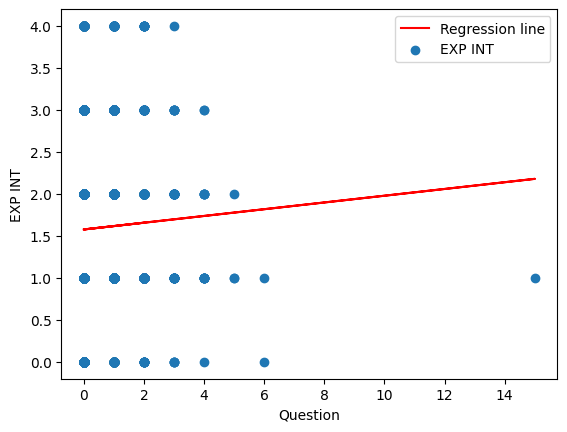

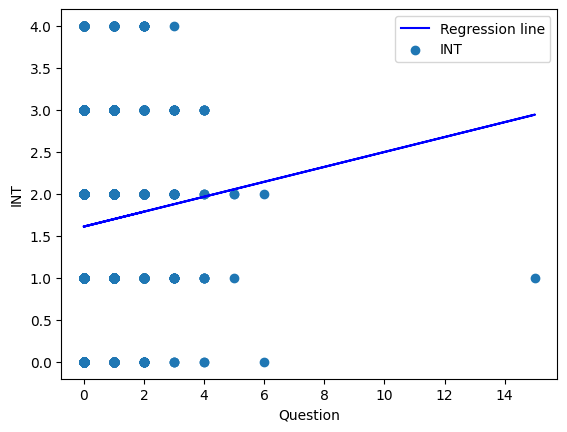

Question和EXP INT的相关系数: 0.03268358353487432
Question和INT的相关系数: 0.06878820575703119


In [25]:
X_question = df["Question"]
y_exp_int = df["EXP INT"]
y_int = df["INT"]

X_question = sm.add_constant(X_question)

model_question_exp_int = sm.OLS(y_exp_int, X_question).fit()

model_question_int = sm.OLS(y_int, X_question).fit()

print("Question作为自变量，EXP INT作为因变量的回归结果：")
print(model_question_exp_int.summary())

print("\nQuestion作为自变量，INT作为因变量的回归结果：")
print(model_question_int.summary())

# 绘制Question作为自变量，EXP INT作为因变量的回归图
plt.scatter(X_question["Question"], y_exp_int, label="EXP INT")
plt.plot(X_question["Question"], model_question_exp_int.predict(), color="red", label="Regression line")
plt.xlabel("Question")
plt.ylabel("EXP INT")
plt.legend()
plt.show()

# 绘制Question作为自变量，INT作为因变量的回归图
plt.scatter(X_question["Question"], y_int, label="INT")
plt.plot(X_question["Question"], model_question_int.predict(), color="blue", label="Regression line")
plt.xlabel("Question")
plt.ylabel("INT")
plt.legend()
plt.show()

# 相关系数（Pearson correlation coefficient）
correlation_question_exp_int = df["Question"].corr(df["EXP INT"])
correlation_question_int = df["Question"].corr(df["INT"])

print("Question和EXP INT的相关系数:", correlation_question_exp_int)
print("Question和INT的相关系数:", correlation_question_int)


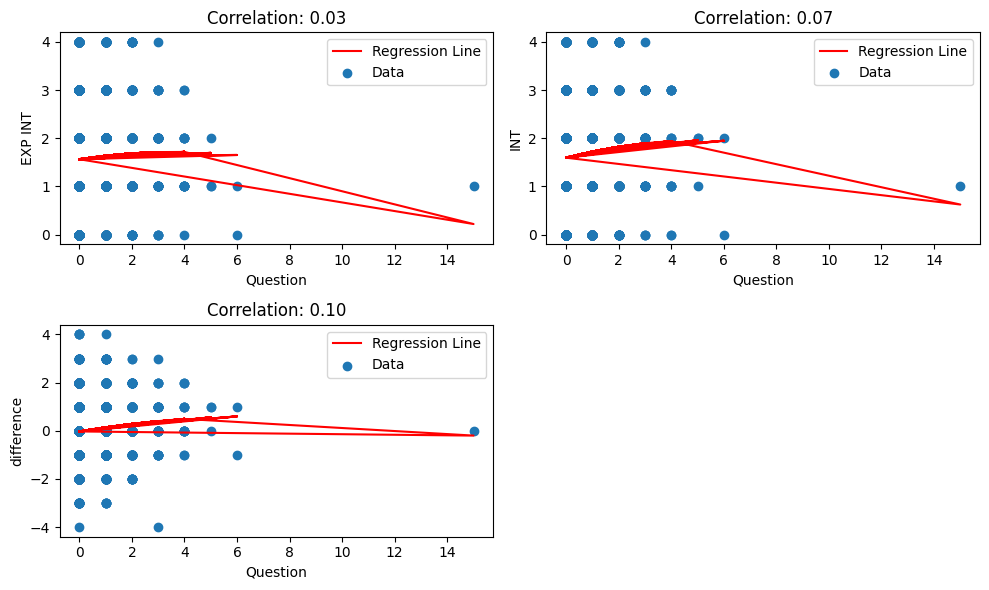

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Read the data from the "remove_student_teacher_processed.xlsx" file
df = pd.read_excel('remove_student_teacher_processed.xlsx')

# Drop rows with missing values in the 'EXP INT' and 'INT' columns
df = df.dropna(subset=['EXP INT', 'INT', 'difference'])

# Extract the "Question," "EXP INT," and "INT" columns
question = df['Question']
exp_int = df['EXP INT']
int_column = df['INT']
diff = df['difference']

# Perform quadratic regression and calculate the correlation coefficient
model_exp_int = LinearRegression()
model_exp_int.fit(np.column_stack((question, question**2)), exp_int)
exp_int_pred = model_exp_int.predict(np.column_stack((question, question**2)))
correlation_exp_int = np.corrcoef(question, exp_int)[0, 1]

model_int = LinearRegression()
model_int.fit(np.column_stack((question, question**2)), int_column)
int_pred = model_int.predict(np.column_stack((question, question**2)))
correlation_int = np.corrcoef(question, int_column)[0, 1]

model_diff = LinearRegression()
model_diff.fit(np.column_stack((question, question**2)), diff)
diff_pred = model_diff.predict(np.column_stack((question, question**2)))
correlation_diff = np.corrcoef(question, diff)[0, 1]

# Plot the data points and the regression line
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.scatter(question, exp_int, label='Data')
plt.plot(question, exp_int_pred, color='red', label='Regression Line')
plt.xlabel('Question')
plt.ylabel('EXP INT')
plt.title(f'Correlation: {correlation_exp_int:.2f}')
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(question, int_column, label='Data')
plt.plot(question, int_pred, color='red', label='Regression Line')
plt.xlabel('Question')
plt.ylabel('INT')
plt.title(f'Correlation: {correlation_int:.2f}')
plt.legend()

plt.subplot(2, 2, 3)
plt.scatter(question, diff, label='Data')
plt.plot(question, diff_pred, color='red', label='Regression Line')
plt.xlabel('Question')
plt.ylabel('difference')
plt.title(f'Correlation: {correlation_diff:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

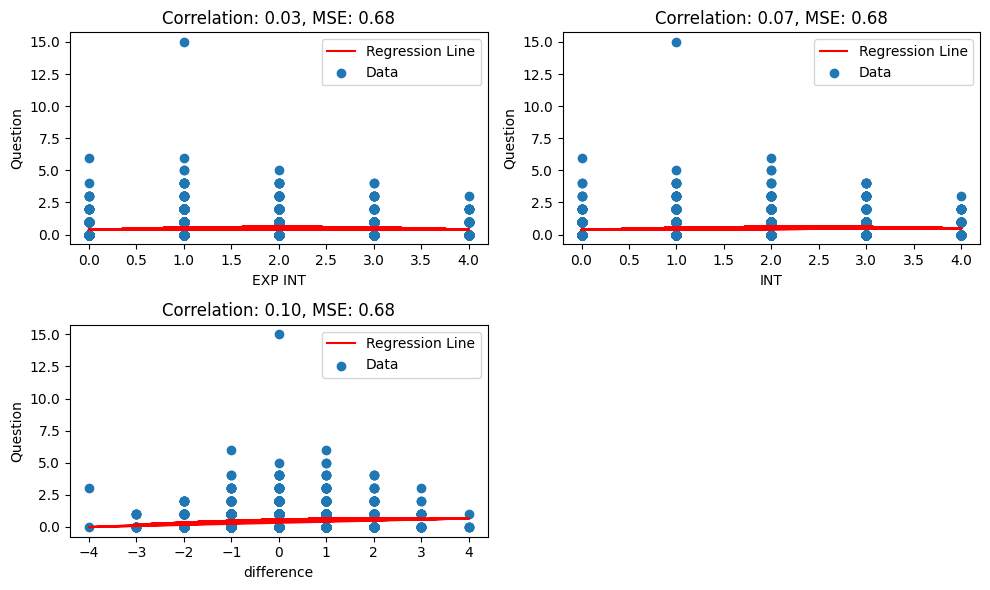

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read the data from the "remove_student_teacher_processed.xlsx" file
df = pd.read_excel('remove_student_teacher_processed.xlsx')

# Drop rows with missing values in the 'EXP INT' and 'INT' columns
df = df.dropna(subset=['EXP INT', 'INT', 'difference'])

# Extract the "Question," "EXP INT," and "INT" columns
question = df['Question']
exp_int = df['EXP INT']
int_column = df['INT']
diff = df['difference']

# Perform quadratic regression and calculate the correlation coefficient
model_question_exp_int = LinearRegression()
model_question_exp_int.fit(np.column_stack((exp_int, exp_int**2)), question)
question_pred_exp_int = model_question_exp_int.predict(np.column_stack((exp_int, exp_int**2)))
correlation_question_exp_int = np.corrcoef(exp_int, question)[0, 1]
mse_question_exp_int = mean_squared_error(question, question_pred_exp_int)

model_question_int = LinearRegression()
model_question_int.fit(np.column_stack((int_column, int_column**2)), question)
question_pred_int = model_question_int.predict(np.column_stack((int_column, int_column**2)))
correlation_question_int = np.corrcoef(int_column, question)[0, 1]
mse_question_int = mean_squared_error(question, question_pred_int)

model_question_diff = LinearRegression()
model_question_diff.fit(np.column_stack((diff, diff**2)), question)
question_pred_diff = model_question_diff.predict(np.column_stack((diff, diff**2)))
correlation_question_diff = np.corrcoef(diff, question)[0, 1]
mse_question_diff = mean_squared_error(question, question_pred_diff)

# Plot the data points and the regression line
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.scatter(exp_int, question, label='Data')
plt.plot(exp_int, question_pred_exp_int, color='red', label='Regression Line')
plt.xlabel('EXP INT')
plt.ylabel('Question')
plt.title(f'Correlation: {correlation_question_exp_int:.2f}, MSE: {mse_question_exp_int:.2f}')
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(int_column, question, label='Data')
plt.plot(int_column, question_pred_int, color='red', label='Regression Line')
plt.xlabel('INT')
plt.ylabel('Question')
plt.title(f'Correlation: {correlation_question_int:.2f}, MSE: {mse_question_int:.2f}')
plt.legend()

plt.subplot(2, 2, 3)
plt.scatter(diff, question, label='Data')
plt.plot(diff, question_pred_diff, color='red', label='Regression Line')
plt.xlabel('difference')
plt.ylabel('Question')
plt.title(f'Correlation: {correlation_question_diff:.2f}, MSE: {mse_question_diff:.2f}')
plt.legend()

plt.tight_layout()
plt.show()
